In [3]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv


In [4]:
df = pd.read_csv("result_zephyr.csv", header=1, encoding='utf-8')
display(df)

,Unnamed: 0,daniel.kalowsky@intel.com,anas.nashif@intel.com,yonattan.a.louise.mendoza@intel.com,peter.mitsis@windriver.com,sarah.a.sharp@intel.com,allan.stephens@windriver.com,johan.hedberg@intel.com,dmitriy.korovkin@windriver.com,andrei.emeltchenko@intel.com,...,jaro.vanlandschoot@basalte.be,amrith@mr-beam.org,mustafa.kus@sparsetechnology.com,markus.swarowsky@nordicsemi.no,vit.stanicek@nxp.com,markus.lassila@nordicsemi.no,tanmay.kathpalia@intel.com,jean.nanchen@gmail.com,jbylicki@antmicro.com,sandip.dalvi@nxp.com
0,kernel/microkernel,1.470588,86.764706,0.0,0.0,0.0,11.764706,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,kernel/microkernel/k_task.c,0.000000,100.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,kernel/microkernel/core,12.500000,75.000000,0.0,12.5,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,kernel/microkernel/core/global.c,0.000000,100.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,kernel/microkernel/k_event.c,0.000000,100.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,modules/openthread/platform,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8330,modules/openthread/platform/crypto_psa.c,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8331,modules/openthread/platform/entropy.c,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8332,modules/openthread/platform/misc.c,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Extrair os nomes dos autores, ignorando a primeira coluna
autores = df.columns[1:].tolist()
print(autores)

# Inicializar dicionários para contar arquivos por desenvolvedor e desenvolvedores por arquivo
arquivos_por_responsavel = {autor: 0 for autor in autores}
responsaveis_por_arquivo = {}

# Iterar sobre cada autor
for autor in autores:
    arquivos = []
    for index, row in df.iterrows():
        try:
            ownership = float(row[autor])
        except ValueError:
            ownership = 0.0
        if ownership > 0:  # Se a posse do arquivo for maior que 0%
            arquivo = row['Unnamed: 0']
            arquivos.append(arquivo)
            arquivos_por_responsavel[autor] += 1  # Incrementar contador de arquivos do desenvolvedor
            
            # Incrementar contador de desenvolvedores do arquivo
            if arquivo in responsaveis_por_arquivo:
                responsaveis_por_arquivo[arquivo].add(autor)
            else:
                responsaveis_por_arquivo[arquivo] = {autor}
    
    if arquivos:  # Só imprimir se houver arquivos
        print(f"Arquivos de {autor}: {arquivos}")
    else:
        print(f"Arquivos de {autor}: Nenhum arquivo encontrado")




['daniel.kalowsky@intel.com', 'anas.nashif@intel.com', 'yonattan.a.louise.mendoza@intel.com', 'peter.mitsis@windriver.com', 'sarah.a.sharp@intel.com', 'allan.stephens@windriver.com', 'johan.hedberg@intel.com', 'dmitriy.korovkin@windriver.com', 'andrei.emeltchenko@intel.com', 'david.norris@intel.com', 'tomasz.bursztyka@linux.intel.com', 'benjamin.walsh@windriver.com', 'luiz.von.dentz@intel.com', 'arkadiusz.lichwa@tieto.com', 'juan.m.cruz.alcaraz@linux.intel.com', 'dirk.j.brandewie@intel.com', 'szymon.janc@tieto.com', 'mariusz.skamra@tieto.com', 'jukka.rissanen@linux.intel.com', 'oleg.zhurakivskyy@intel.com', 'rodrigo.caballero.abraham@intel.com', 'patrik.flykt@linux.intel.com', 'ravikumar.veeramally@linux.intel.com', 'daniel.leung@intel.com', 'javier.b.perez.hernandez@linux.intel.com', 'andrew.p.boie@intel.com', 'gerardo.aceves@intel.com', 'adrianx.pochiu@intel.com', 'grzegorz.kolodziejczyk@tieto.com', 'ricardo.gonzaga@intel.com', 'shuang.he@intel.com', 'michael.lemay@intel.com', 'jblai

In [6]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values() if count > 0)
    return responsaveis_com_arquivos

total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de responsáveis: {total_responsaveis}")

Total de responsáveis: 266


In [7]:
# Função para contar o número total de contribuidores por arquivos
def contar_contribuidores_com_arquivos(arquivos_por_responsavel):
    contribuidores_com_arquivos = sum(1 for count in arquivos_por_responsavel.values())
    return contribuidores_com_arquivos

total_responsaveis = contar_contribuidores_com_arquivos(arquivos_por_responsavel)
print(f"Total de contribuidores: {total_responsaveis}")

Total de contribuidores: 1680


In [8]:
# Caminho do arquivo CSV de saída
output_file = 'contagem_arquivos_por_responsavel_zephyr.csv'

# Escrever contagem de arquivos por responsavel em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Responsável', 'Descrição'])

    for autor, count in arquivos_por_responsavel.items():
        if count == 1:
            writer.writerow([autor, f"{count}"])
        else:
            writer.writerow([autor, f"{count}"])

print(f"Contagem de arquivos por desenvolvedor salva em {output_file}")



Contagem de arquivos por desenvolvedor salva em contagem_arquivos_por_responsavel_zephyr.csv


In [9]:
data = pd.read_csv("contagem_arquivos_por_responsavel_zephyr.csv", encoding='utf-8')
display(data)

,Responsável,Descrição
0,daniel.kalowsky@intel.com,13
1,anas.nashif@intel.com,3438
2,yonattan.a.louise.mendoza@intel.com,1
3,peter.mitsis@windriver.com,28
4,sarah.a.sharp@intel.com,0
...,...,...
1675,markus.lassila@nordicsemi.no,0
1676,tanmay.kathpalia@intel.com,1
1677,jean.nanchen@gmail.com,0
1678,jbylicki@antmicro.com,0


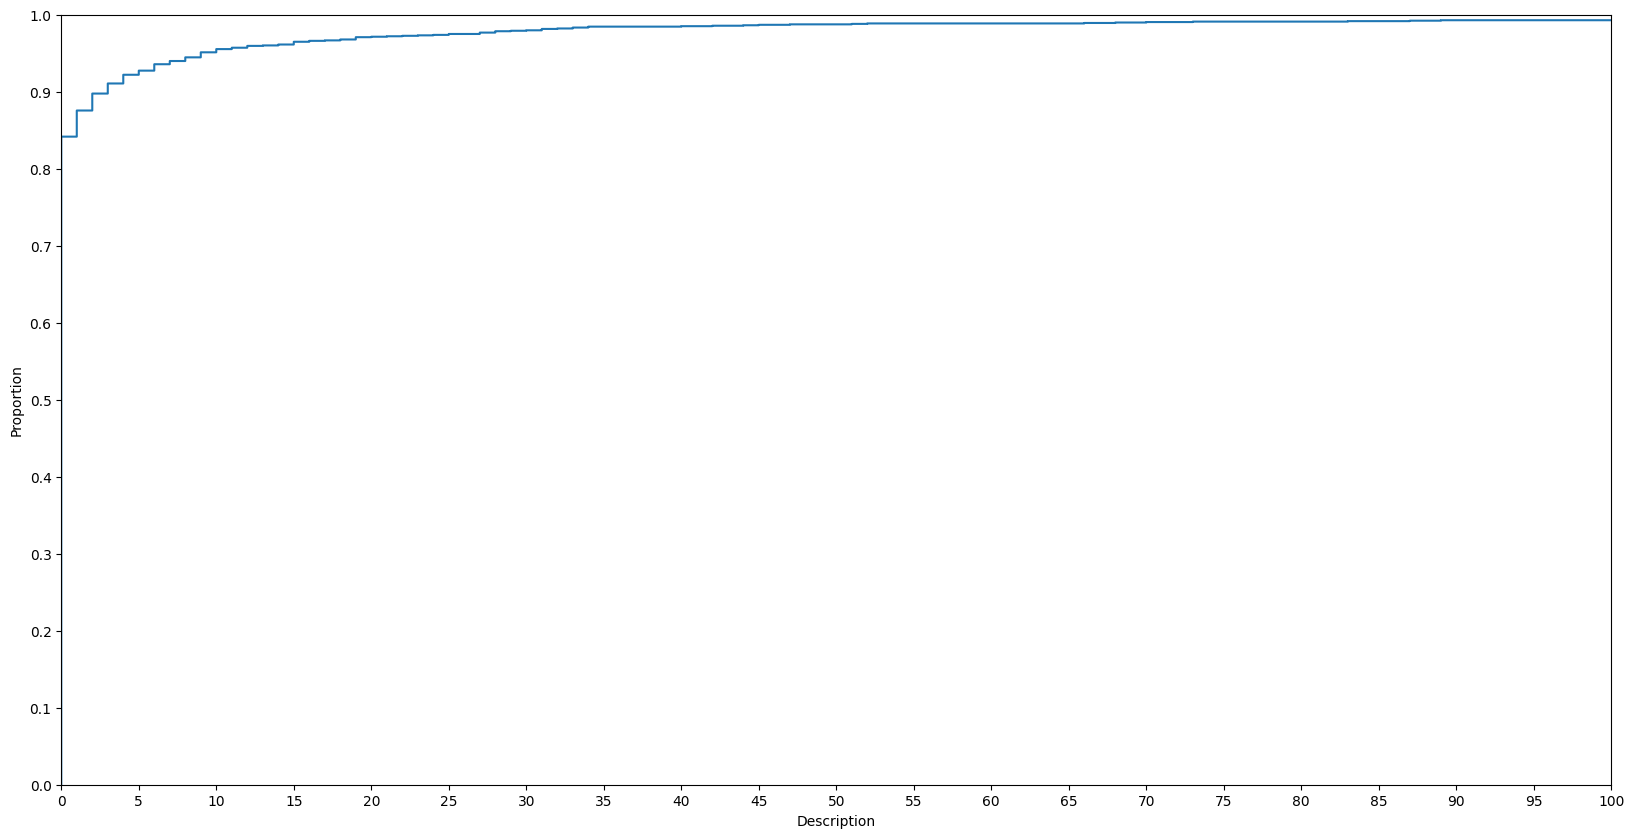

In [10]:
# Converter a coluna "Descrição" para valores numéricos
data['Descrição'] = pd.to_numeric(data['Descrição'], errors='coerce')

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF
sns.ecdfplot(data=data, x='Descrição')


plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Description') # Definir o rótulo do eixo x

# Ajustar a escala do eixo x
plt.xlim(0, 100)  

# Ajustar os ticks do eixo x para que sejam de 5 em 5
plt.xticks(np.arange(0, 101, 5))

# Exibir o gráfico
plt.show()

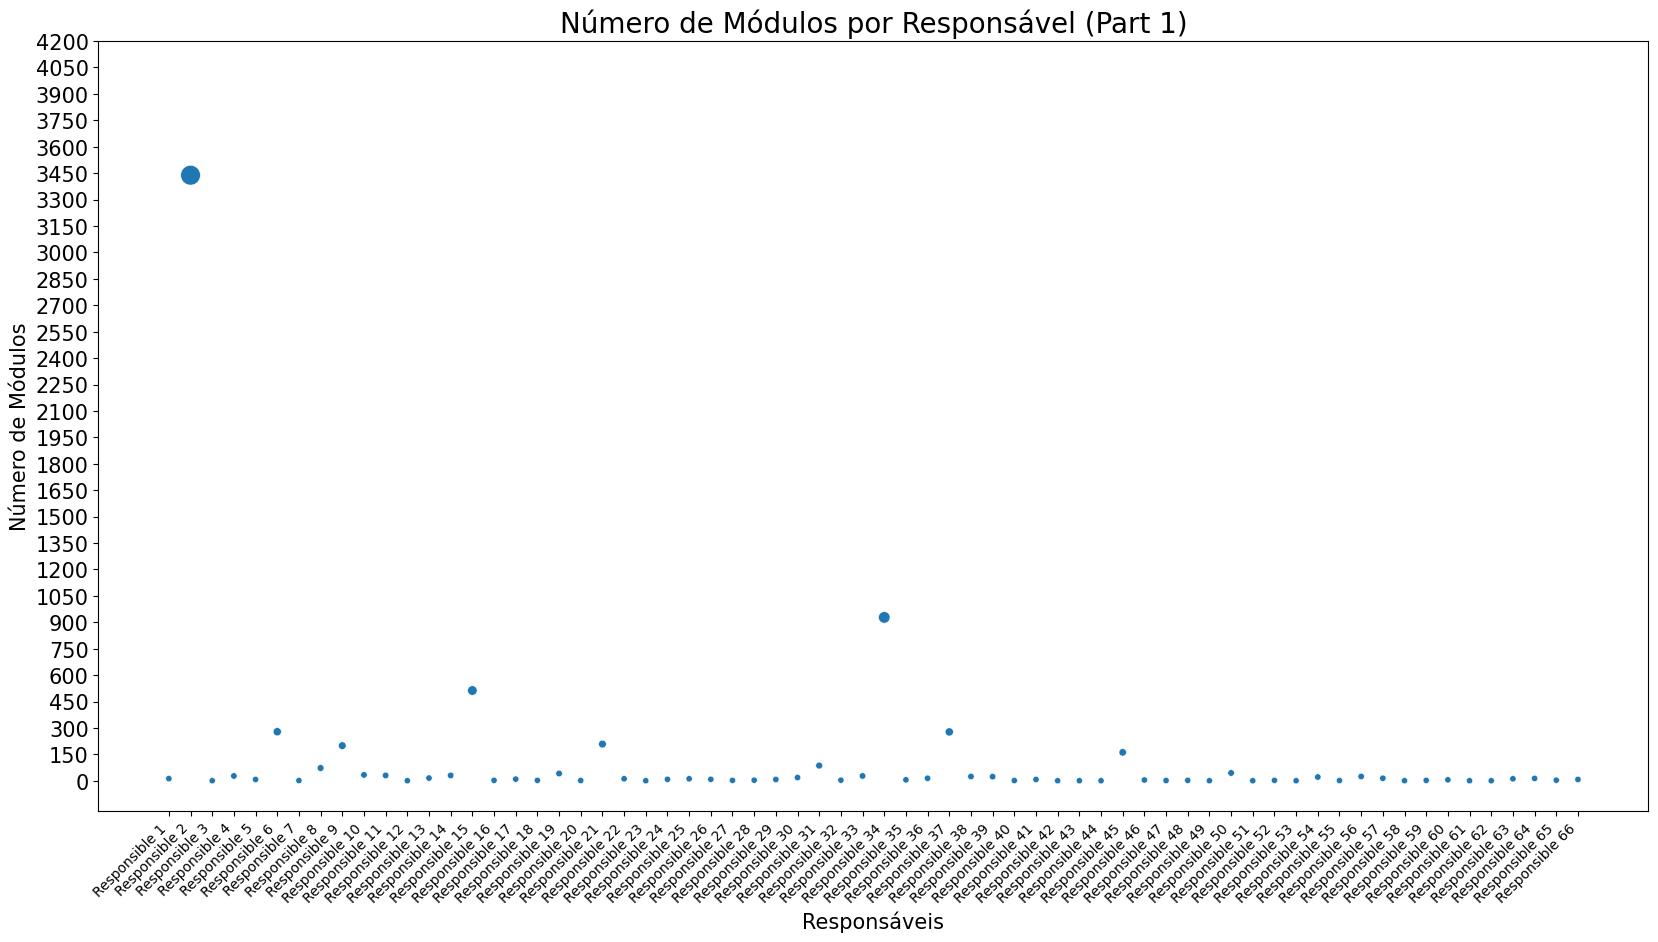

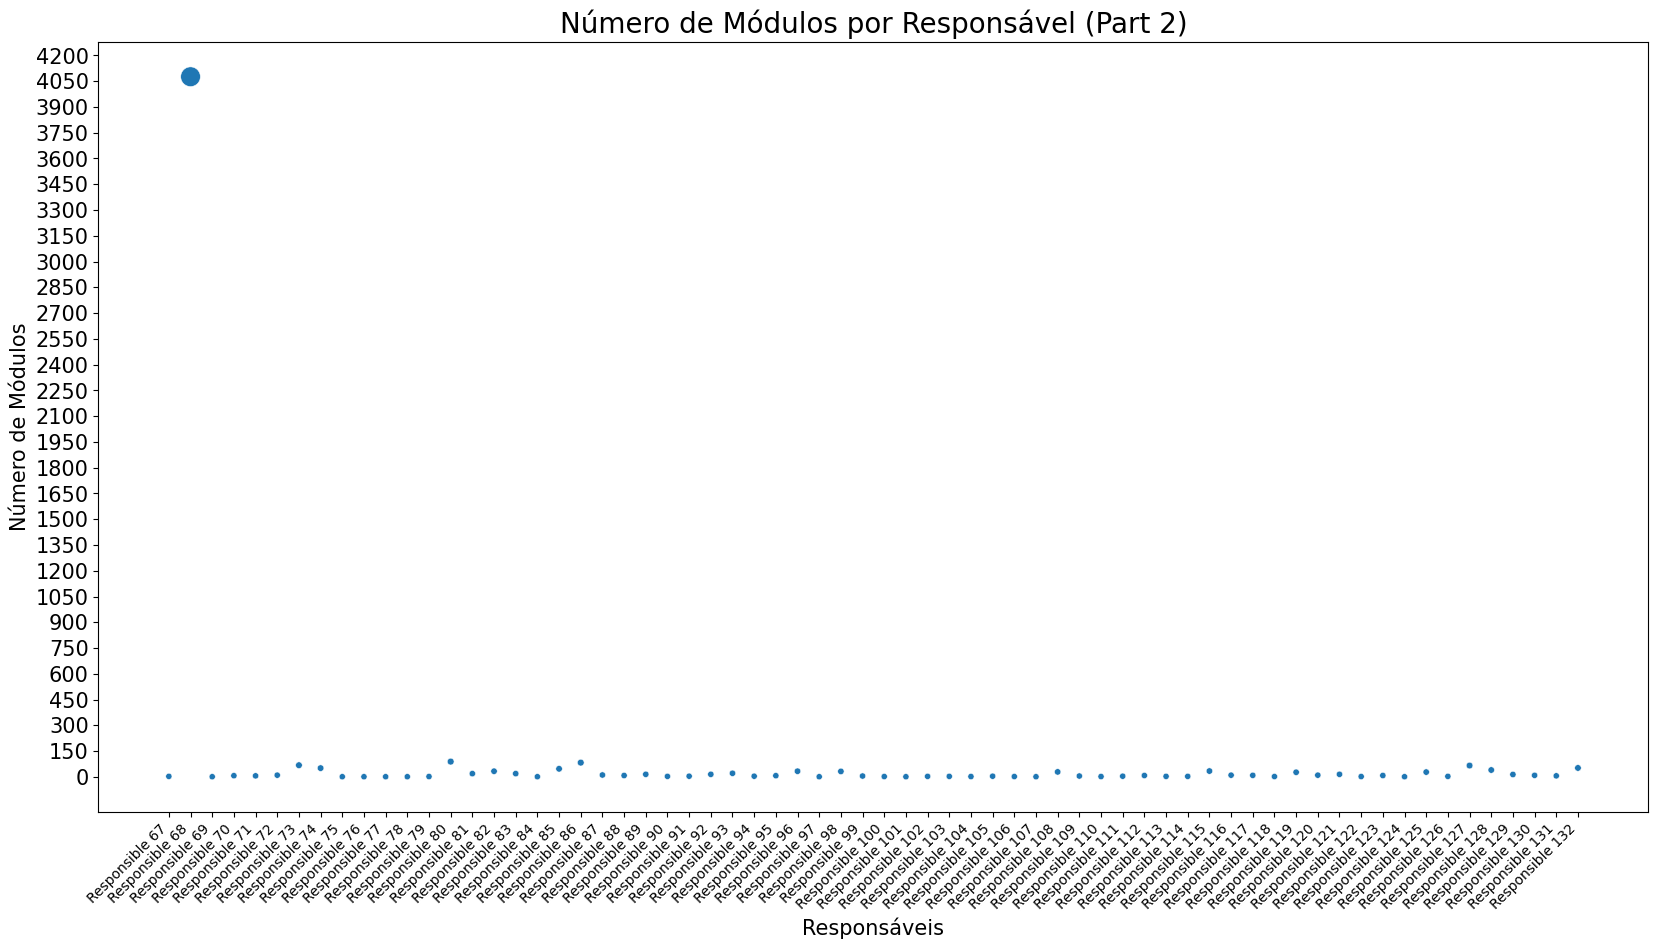

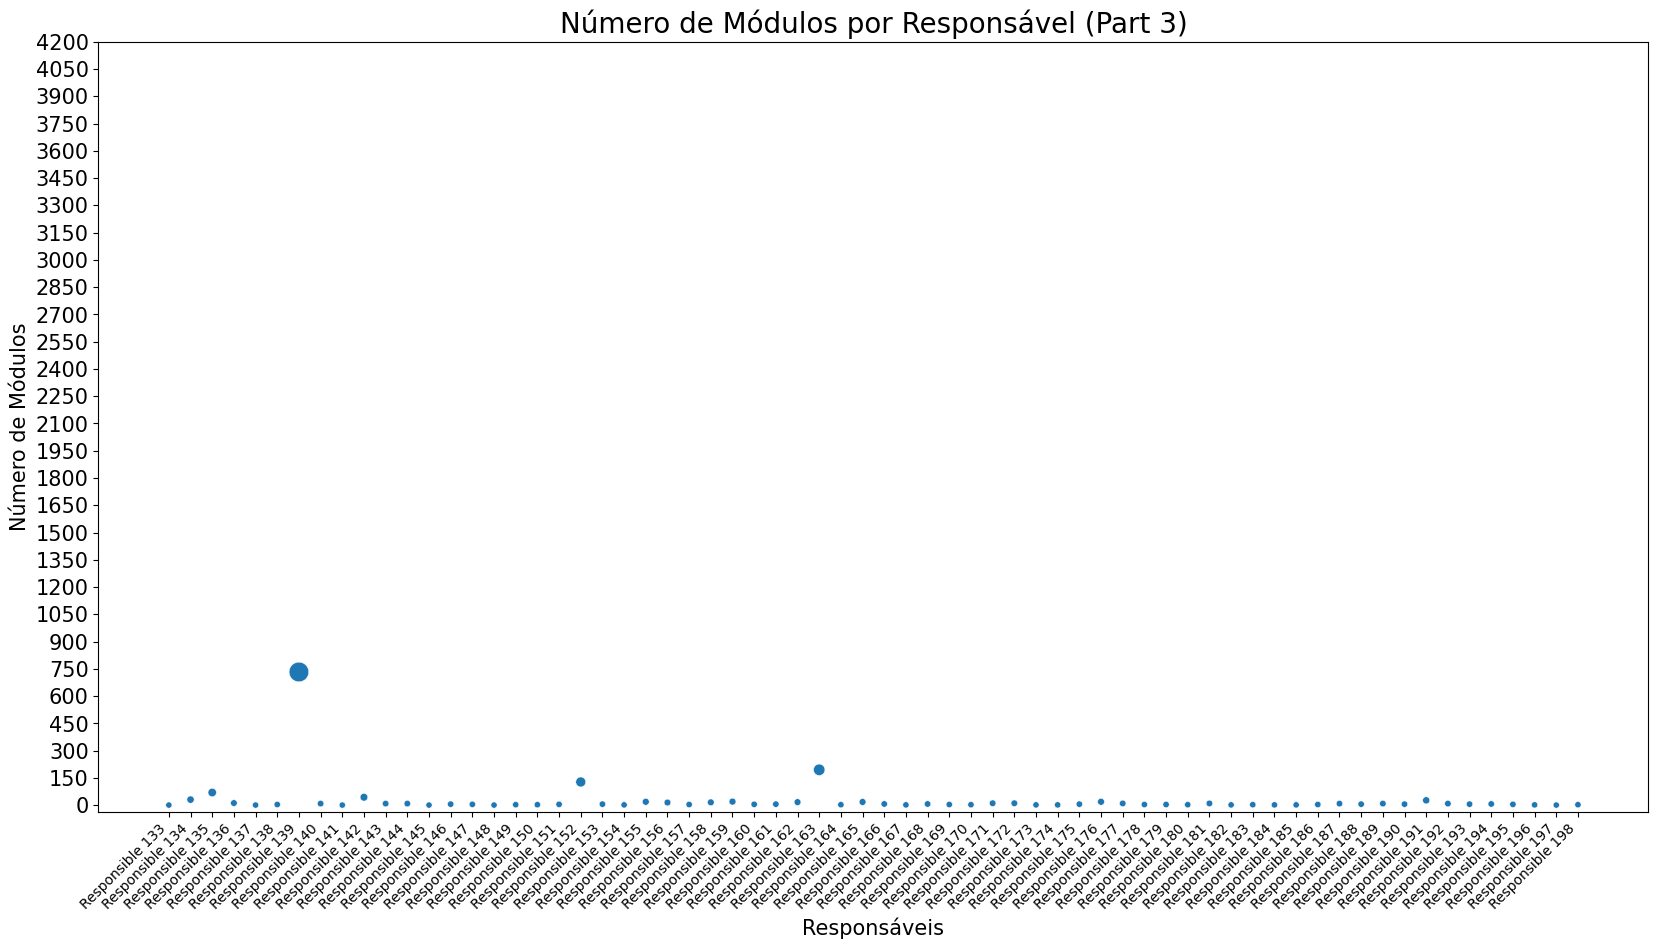

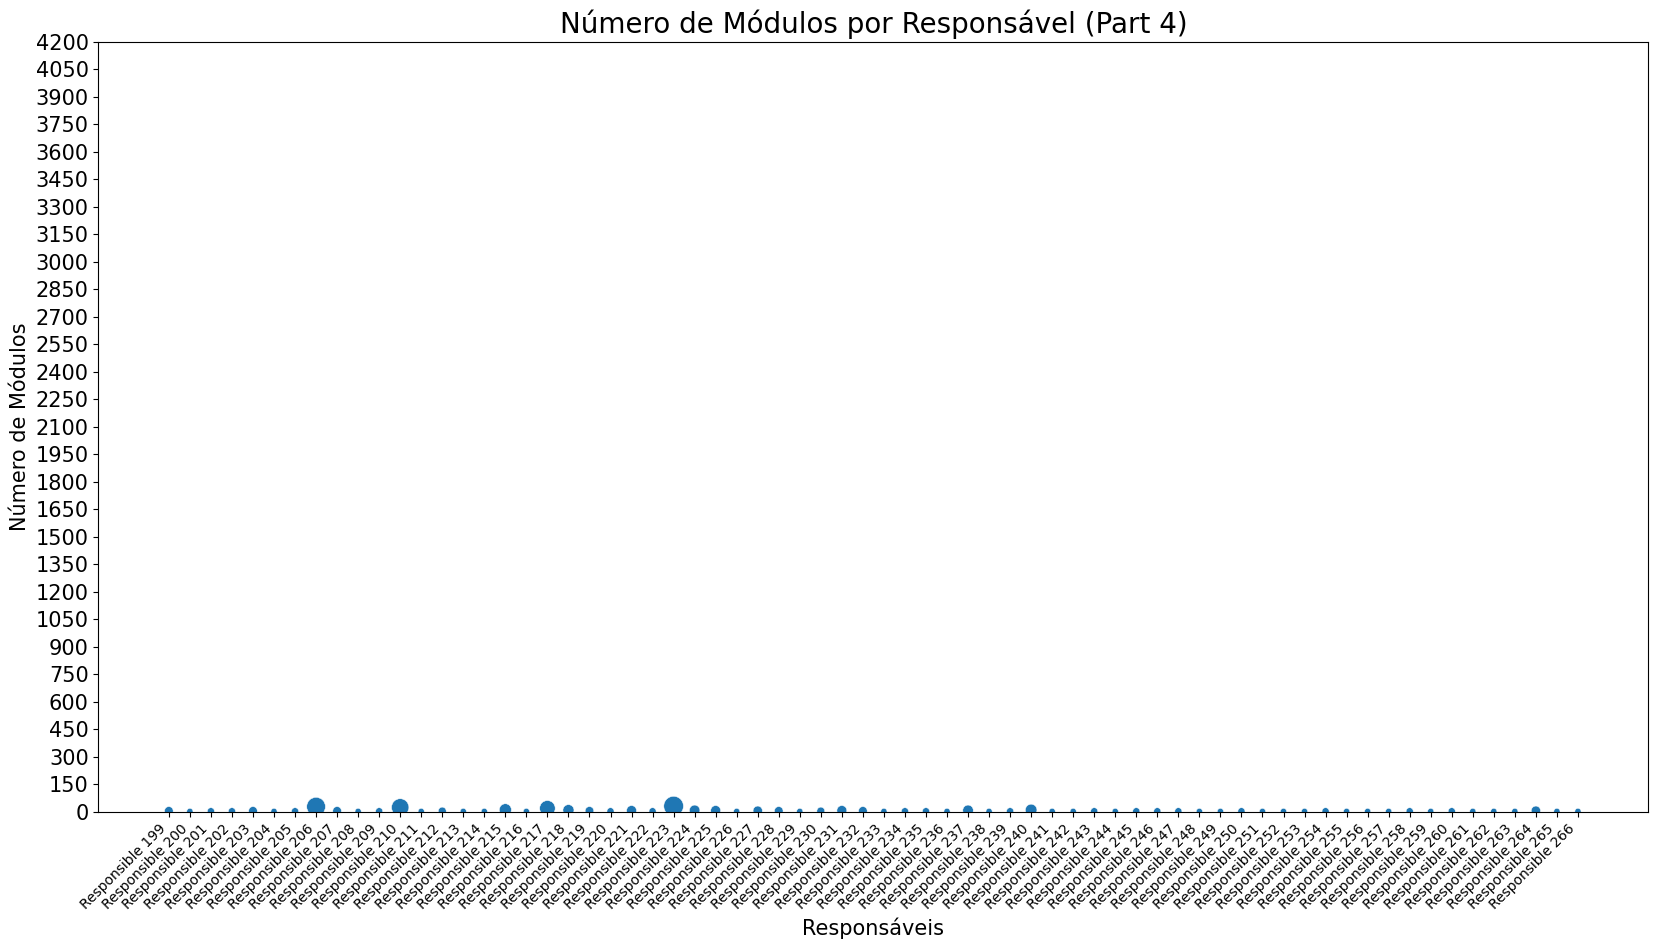

In [11]:

# Filtrar os dados para mostrar apenas aqueles com mais de 0 arquivos
filtered_data = data[data['Descrição'] > 0].copy()

# Substituir e-mails por "Responsável 1", "Responsável 2", etc.
filtered_data['Responsável'] = ['Responsible {}'.format(i+1) for i in range(len(filtered_data))]

# Criar uma coluna "Tamanho" para o tamanho das bolhas
filtered_data['Tamanho'] = filtered_data['Descrição'] * 10  # Ajuste conforme necessário

# Dividir os dados em quatro subconjuntos
part_size = len(filtered_data) // 4
data_part1 = filtered_data.iloc[:part_size]
data_part2 = filtered_data.iloc[part_size:2*part_size]
data_part3 = filtered_data.iloc[2*part_size:3*part_size]
data_part4 = filtered_data.iloc[3*part_size:]

# Gráfico 1
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part1, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsáveis', fontsize=15)
plt.ylabel('Número de Módulos', fontsize=15)
plt.title('Número de Módulos por Responsável (Part 1)', fontsize=20)
plt.yticks(np.arange(0, 4201, 150), fontsize=15)

# Exibir o primeiro gráfico
plt.show()

# Gráfico 2
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part2, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsáveis', fontsize=15)
plt.ylabel('Número de Módulos', fontsize=15)
plt.title('Número de Módulos por Responsável (Part 2)', fontsize=20)
plt.yticks(np.arange(0, 4201, 150), fontsize=15)

# Exibir o segundo gráfico
plt.show()

# Gráfico 3
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part3, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsáveis', fontsize=15)
plt.ylabel('Número de Módulos', fontsize=15)
plt.title('Número de Módulos por Responsável (Part 3)', fontsize=20)
plt.yticks(np.arange(0, 4201, 150), fontsize=15)

# Exibir o terceiro gráfico
plt.show()

# Gráfico 4
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part4, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsáveis', fontsize=15)
plt.ylabel('Número de Módulos', fontsize=15)
plt.title('Número de Módulos por Responsável (Part 4)', fontsize=20)
plt.yticks(np.arange(0, 4201, 150), fontsize=15)

# Exibir o quarto gráfico
plt.show()

In [12]:
# Contar número de responsáveis por arquivo
num_responsaveis_por_arquivo = {arquivo: len(responsaveis) 
                                   for arquivo, responsaveis in responsaveis_por_arquivo.items()}
# Caminho do arquivo CSV de saída
output_file = 'contagem_responsaveis_por_arquivo_zephyr.csv'

# Escrever contagem de desenvolvedores por arquivo em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Arquivo', 'Descrição'])

    for arquivo, count in num_responsaveis_por_arquivo.items():
        if count > 1:
            writer.writerow([arquivo, f"{count} "])
        else:
            writer.writerow([arquivo, f"{count} "])

print(f"Contagem de desenvolvedores por arquivo salva em {output_file}")

Contagem de desenvolvedores por arquivo salva em contagem_responsaveis_por_arquivo_zephyr.csv


In [13]:
data = pd.read_csv("contagem_responsaveis_por_arquivo_zephyr.csv", encoding='utf-8')
display(data)

,Arquivo,Descrição
0,kernel/microkernel,3
1,kernel/microkernel/core,3
2,kernel/nanokernel,4
3,arch/arc,5
4,arch/x86,4
...,...,...
7337,drivers/sensor/npm1300_charger,1
7338,drivers/sensor/npm1300_charger/npm1300_charger.c,1
7339,drivers/mbox/mbox_nxp_s32_mru.c,1
7340,soc/arm/nxp_s32/common/osif.c,1


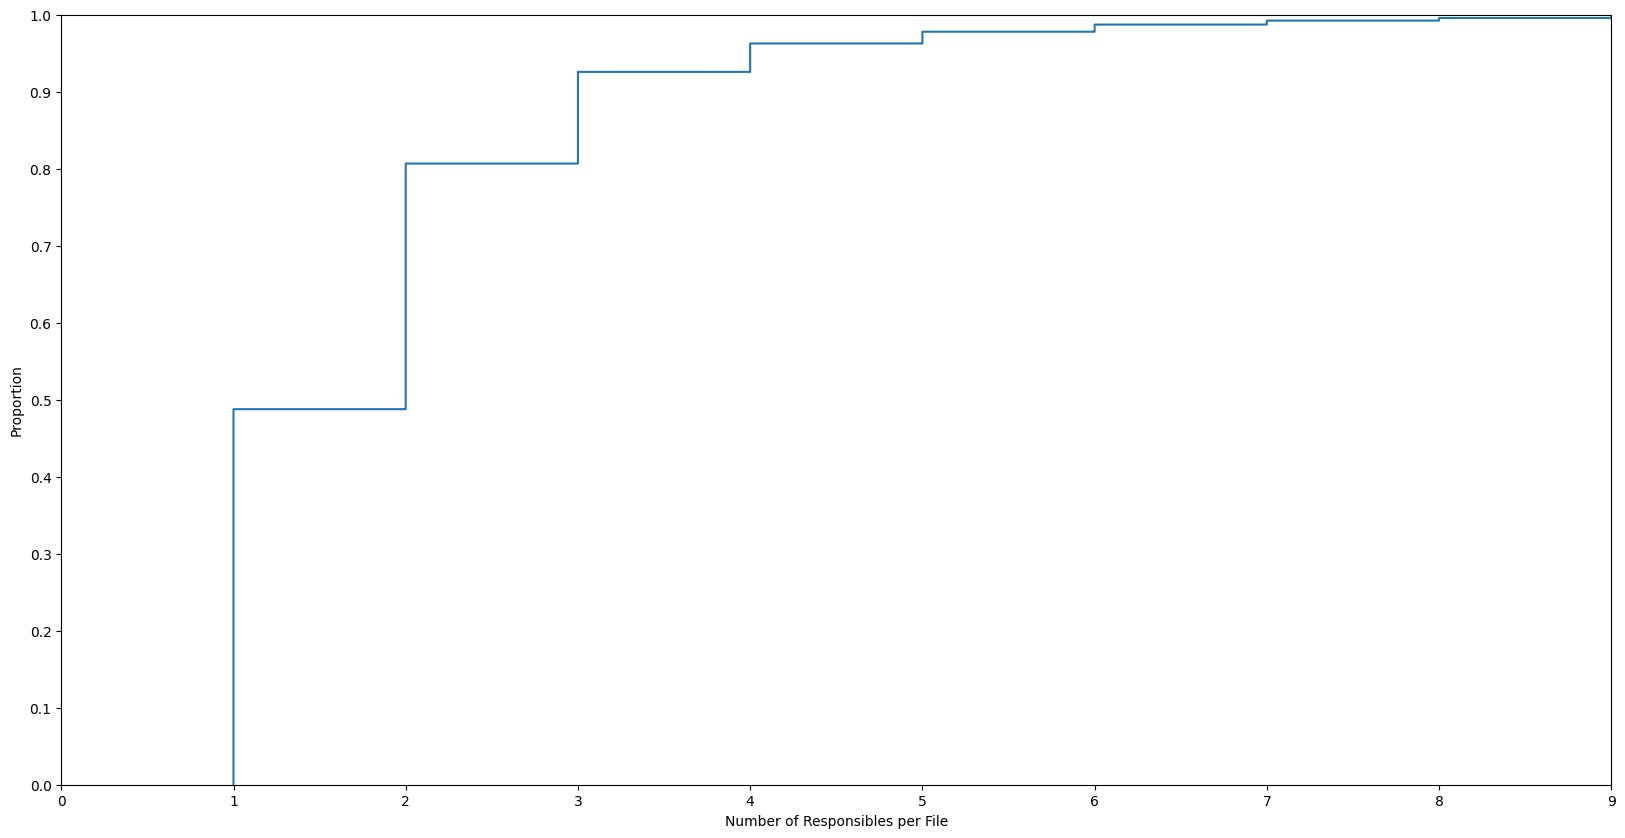

In [14]:
# Converter o dicionário para um DataFrame
data_responsaveis = pd.DataFrame(list(num_responsaveis_por_arquivo.items()), columns=['Arquivo', 'Contagem'])

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF para a contagem de responsáveis por arquivo
sns.ecdfplot(data=data_responsaveis, x='Contagem')

plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Number of Responsibles per File')  # Definir o rótulo do eixo x

# Ajustar a escala do eixo x, se necessário
plt.xlim(0, 9)  # Ajuste conforme necessário

# Ajustar os ticks do eixo x para intervalos regulares, aqui ajustei para 1 em 1
plt.xticks(np.arange(0, 10, 1))

# Exibir o gráfico
plt.show()